### Recordatorio:
- Debes ejecutar la siguiente celda para poder jugar con lo que tenemos preparado
- Para ejecutar una celda la tienes que seleccionar y pulsar: Ctrl + Enter (Shift + Enter también vale)
- Cuando la hayas ejecutado, para iniciar el modo presentación teclea: alt + R
- Con las teclas de AvPág y RePág, adelantas o retrocedes en la presentación
- En Chrome puedes habilitar el modo a pantalla completa con: F11
- Para salir del modo presentación vuelve a teclear: alt + R

In [1]:
#@title Módulos (o librerías, o paquetes) que hay que cargar previamente
# Si no ejecutas esta celda no vas a poder interactuar con las celdas que vendrán a continuación
from IPython.display import IFrame
from IPython.display import Image
from IPython.display import Audio
from IPython.display import YouTubeVideo
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:85% !important; }</style>"))
js = "<script>hoy = new Date();var eta_ms = new Date(hoy.getFullYear(), hoy.getMonth(), hoy.getDate(), 19, 13).getTime() - Date.now();var timeout = setTimeout(function(){alert('Héctor, quizá podrías dejar tranquilita ya a la gente, ¿no? Gracias :)');}, eta_ms);</script>"
display(HTML(js))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
import matplotlib.mlab as ml
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from ipywidgets import interactive
import scipy.io.wavfile as wavfile # sirve para leer ficheros WAV: https://docs.scipy.org/doc/scipy/reference/tutorial/io.html#module-scipy.io.wavfile
import scipy.signal as sig # hilbert, espectrograma, chirp
import pywt # sirve para la transformada de wavelet: pip install PyWavelets
import pandas as pd
import urllib.request
import warnings
warnings.filterwarnings('ignore')
class displayhoriz(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">{1}</div>"""
    def __init__(self, *args):
        self.args = args
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_()) for a in self.args)
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a)) for a in self.args)

# Tema 1.- Conceptos básicos de acústica
- Ondas en fluidos
- Propiedades y magnitudes básicas
- Interacción entre ondas: superposición, interferencia, reflexión, refracción y difracción
- Energética de las ondas acústicas
- Ecuación de ondas

## Créditos

Muchas de las animaciones usadas en este tema provienen de:
- <a href="https://www.acs.psu.edu/drussell/demos.html">https://www.acs.psu.edu/drussell/demos.html</a>
- <a href="http://resource.isvr.soton.ac.uk/spcg/tutorial/tutorial/StartCD.htm">http://resource.isvr.soton.ac.uk/spcg/tutorial/tutorial/StartCD.htm</a>

La derivación de la ecuación de ondas se puede encontrar en:
- <a href="http://www.feynmanlectures.caltech.edu/I_47.html">http://www.feynmanlectures.caltech.edu/I_47.html</a>
- <a href="https://en.wikibooks.org/wiki/Engineering_Acoustics/Acoustic_wave_equation">https://en.wikibooks.org/wiki/Engineering_Acoustics/Acoustic_wave_equation</a>


## Objetivo principal
- Revisar y conocer los conceptos y el lenguaje de la acústica

### Objetivo adicional
- Presentar la herramienta que se usará para la parte práctica de la asignatura: _python_


## Ondas en fluidos

Presión sonora

<a href="https://en.wikipedia.org/wiki/Sound_pressure">
    <img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/PresionSonora.jpg" alt="drawing" width="500"/>
</a>


**¿Quieres oírlo?**

Pon auriculares en el ordenador para no volvernos locos y continúa con la presentación

In [2]:
# ¿Qué hace esta celda?
# Crea un par de variables (fm, tmax), un par de arrays (o vectores, si lo prefieres) usando el módulo "numpy"
# Y por último crea un objeto de audio a partir de un vector
fm = 44100 # Hz; frecuencia de muestreo
tmax = 2.0    # segundos; tiempo que va a durar la señal
t = np.linspace(0, tmax, int(tmax*fm)) # variable tiempo
y = 0.5*np.sin(2*np.pi*440*t) # una señal seno con una frecuencia de 440 Hz
Audio(y, rate=fm) # carga un array de numpy (y) como un sonido; hay que dar la frecuencia de muestreo, claro

Ahora Héctor debería explicar algunas cosillas de *python*, *jupyter*, *numpy*, y otros rollos. Pon cara de que estás atendiendo. &#x1F607;

Posiblemente quieras visualizar lo que acabas de oír. Bien, continúa.

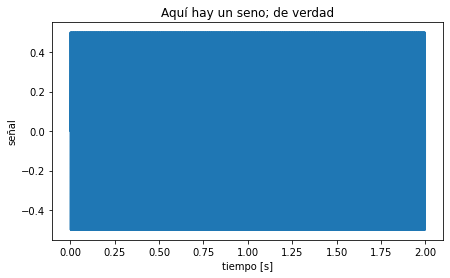

In [3]:
# ¿Qué hace esta celda?
# Crea una figura (usando el módulo pyplot de matplotlib) de un tamaño determinado
# Añade unos ejes (ax) a esa figura (fig)
# Añade un plot, un título y unas etiquetas a los ejes X e Y
miprimerafigura = plt.figure(figsize=(7, 4))

ax = miprimerafigura.add_subplot(1, 1, 1)
ax.plot(t,y)
ax.set_title('Aquí hay un seno; de verdad')
ax.set_xlabel('tiempo [s]')
ax.set_ylabel('señal');
# Vaya, ¿es esto un seno?

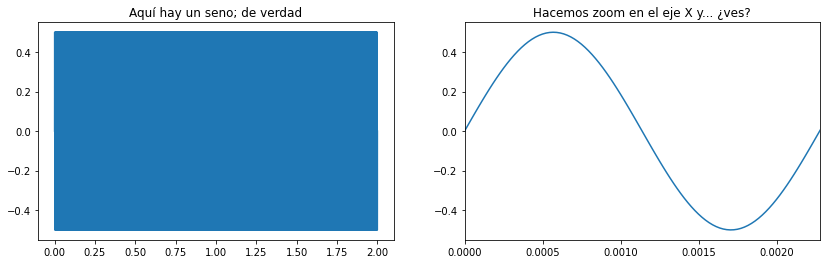

In [4]:
# ¿Qué hace esta celda?
# Es parecida a la anterior. En esta ocasión se añade unos ejes (ax1 y ax2) a la figura (fig)
# Añade un plot a cada eje; y cambia los límites del eje X de ax2
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(t,y)
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(t,y)
ax2.set_xlim(0,1/440) # ¿te crees ahora que la señal es un seno?
ax1.set_title('Aquí hay un seno; de verdad')
ax2.set_title('Hacemos zoom en el eje X y... ¿ves?');

### Propiedades del medio
- Inercia
- Elasticidad

Generación de una onda longitudinal en un extremo de un tubo infinito (no hay reflexión en el otro extremo)
- Velocidad de propagación de la onda (es decir, velocidad del sonido)
- Velocidad de la partícula

<p float="left">
    <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/OndaLongitudinal_01.gif" alt="drawing" width="500"/>
    <img align="right" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/OndaLongitudinal_02.gif" alt="drawing" width="500"/>
</p>


### Propiedades y magnitudes básicas

Movimiento armónico simple

$$ x = x_0 \mathrm{sen}\left(\omega_0 t + \phi \right) $$
$$ \omega_0 = 2 \pi f_0 $$

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/seno.jpg"  alt="drawing" width="400"/>


Frecuencia y período

$$ f = \frac{1}{T} $$

<center>
<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/RangoFrecuencia.jpg" alt="drawing" width="600"/>
<small>Fuente: <a href="http://www.cochlea.org/es/sonidos/campo-auditivo-humano">http://www.cochlea.org/es/sonidos/campo-auditivo-humano</a></small>
</center>

Onda acústica longitudinal

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/isvr-longipatm.gif" alt="drawing" width="500"/>

Velocidad del sonido ($c$) para el aire

$$ c = \sqrt{\gamma R T} $$ 

con $\gamma=1.4$, $R=287~J/kgK$ y $T$ en $K$
- Es independiente de la frecuencia

Longitud de onda ($\lambda$)
- Mínima distancia entre dos frentes de onda con la misma fase

Relación importante:

$$ \lambda = \frac{c}{f} $$


Relación entre frecuencia, velocidad del sonido y longitud de onda:

$$ \lambda = \frac{c}{f} $$

Ejemplo con la misma velocidad del sonido: alta frecuencia implica longitud de onda más corta

<center><img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/isvr-longitest3bis.gif" alt="drawing" width="500"/>

Relación entre frecuencia, velocidad del sonido y longitud de onda: 

$$ \lambda = \frac{c}{f} $$

Ejemplo con la misma frecuencia: alta velocidad del sonido implica longitud de onda más larga

<center><img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/isvr-longitest11bis.gif" alt="drawing" width="500"/>

## Interacción entre ondas
- Superposición
- Interferencia
- Reflexión
- Refracción
- Difracción 

### Superposición
- Las ondas pueden combinarse de forma que, en un punto y un momento determinados, pueden tener efectos constructivos (la amplitud aumenta) o destructivos (la amplitud disminuye)
- Una propiedad de las ondas es que no se deforman cuando se encuentran
- Cuando se solapan, la presión sonora resultante es la suma de las presiones sonoras de las ondas individuales (en esa posición y momento)

<img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/pulses.gif" alt="drawing" width="500"/>


Onda estacionaria

- Se forma cuando dos ondas con la misma frecuencia viajan (con la misma velocidad de propagación, obviamente) en sentido contrario
- Se observan puntos de amplitud nula (nodos) y de amplitud máxima (anti-nodos)

<img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/standing.gif" alt="drawing" width="500"/>



### Interferencia
Para analizar los fenómenos de interferencia se usará una onda esférica (generada por una esfera vibrante de pequeñas dimensiones, es decir, una fuente puntual)

A esta situación se le llama monopolo acústico

<p float="left">
    <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/isvr-monopolfinal.gif" alt="drawing" width="500"/>
</p>

Influencia de la separación entre las fuentes
- Dos fuentes puntuales de igual potencia, vibrando en fase con la misma frecuencia
- Separados una (izquierda), dos (medio) o cuatro (derecha) longitudes de onda
- Patrones de interferencia constructiva y destructiva

<p float="left">
    <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/isvr-interfmonopcolcol.gif" alt="drawing" width="250"/>
    <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/isvr-intermonopcolcol2.gif" alt="drawing" width="250"/>
    <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/isvr-interfmonopcolcol4.gif" alt="drawing" width="250"/>
</p>


Influencia de la frecuencia de vibración de las fuentes
- Dos fuentes puntuales de igual potencia y separadas dos longitudes de onda
- Vibrando en fase con la misma frecuencia (izquierda) o con diferentes frecuencias (derecha)
- Patrones de interferencia constructiva y destructiva

<p float="left">
    <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/isvr-intermonopcolcol2.gif" alt="drawing" width="300"/>
    <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/isvr-interferonbis.gif" alt="drawing" width="300"/>
</p>


Ejemplo: Control activo del ruido (active noise control)
- Nivel de presión sonora en la cabina de un avión (izquierda)
- Campo acústico originado en una habitación por un altavoz (arriba, derecha) e incorporando otro altavoz con el fin de cancelarlo (abajo, derecha)

<p float="left">
    <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/isvr-image004.gif" alt="drawing" width="400"/>
    <img align="right" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/isvr-ANCrooms.gif" alt="drawing" width="400"/>
</p>


### Reflexión
- Aparece cuando hay cambios geométricos o en el medio de propagación
- Izquierda: movimiento onda transversal en una cuerda al llegar al extremo fijo
- Derecha: presión sonora de una onda longitudinal al llegar a una pared rígida

<p float="left">
    <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/isvr-reflexhard.gif" alt="drawing" width="400"/>
    <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/isvr-reflexsoft.gif" alt="drawing" width="400"/>
</p>


La reflexión puede superponerse con la fuente y originar interferencias

Una fuente puntual colocada frente a una pared rígida: influencia de la distancia fuente-pared

<p float="left">
    <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/isvr-interreflexion22.gif" alt="drawing" width="300"/>
    <img align="right" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/isvr-interreflexion34.gif" alt="drawing" width="300"/>
</p>


La reverberación se produce cuando la diferencia temporal entre las recepciones de los sonidos directo y reflejado es inferior a 0.1 s

<p float="left">
    <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/reverberacion01.jpg" alt="drawing" width="300"/>
    <img align="right" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/reverberacion02.jpg" alt="drawing" width="300"/>
</p>


Una alternativa para el cálculo de los fenómenos de reflexión es la acústica geométrica

Trata las ondas sonoras como rayos

<center><img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/acusticageometrica.jpg" alt="drawing" width="500"/></center>


### Refracción
- Cambio en la dirección de propagación en las ondas transmitidas cuando se pasa de un medio a otro
- En medios reales también se produce absorción de la onda
- Al pasar la onda del medio 1 al 2 se cumple la <a href="https://en.wikipedia.org/wiki/Snell%27s_law">Ley de Snell</a> de la refracción:

$$ \frac{c_1}{c_2} = \frac{\mathrm{sen}\theta_1}{\mathrm{sen}\theta_2} = \frac{\lambda_1}{\lambda_2} $$

<p float="left">
    <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/refraccion01.jpg" alt="drawing" width="400"/>
    <img align="right" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/isrv-refracter.gif" alt="drawing" width="400"/>
</p>


La refracción de la luz da lugar a muchas aplicaciones en el campo de la óptica y <a href="https://en.wikipedia.org/wiki/Rainbow">fenómenos conocidos</a>. En acústica no hay tantas manifestaciones.

Aplicación curiosa: propagación del sonido a mucha distancia si se da el fenómeno de <a href="https://en.wikipedia.org/wiki/Inversion_(meteorology)">inversión térmica</a>

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/refraccion02.jpg" alt="drawing" width="500"/>

<small>Fuente: <a href="https://acousticstoday.org/10-world-sound-reflection-refraction-principle-least-time/">https://acousticstoday.org/10-world-sound-reflection-refraction-principle-least-time/</a></small>


### Difracción
- Cambio en la dirección de propagación de las ondas cuando encuentran un obstáculo
- Es muy importante la relación entre la longitud de onda y el tamaño característico del obstáculo

<p float="left">
    <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/difraccion01.jpg" alt="drawing" width="400"/>
    <img align="right" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/difraccion02.jpg" alt="drawing" width="400"/>
</p>

Aplicación práctica: <a href="https://en.wikipedia.org/wiki/Noise_barrier">barreras acústicas</a>

<p float="left">
    <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/barrerasonora.jpg" alt="drawing" width="400"/>
    <img align="right" src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/isvr-diffractmovmov.gif" alt="drawing" width="400"/>
</p>

## Energética de las ondas acústicas
<a href="https://en.wikipedia.org/wiki/Sound_power">Potencia acústica</a>
- Cantidad de energía emitida por una fuente por unidad de tiempo
- Valores indicativos

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/RangoIntensidad.jpg" alt="drawing" width="500"/>

Fuente | Potencia (W)
--- | ---
Motor cohete | $10^7$
Compresor | $1$
Vivienda | $10^{-7}$

Nivel de potencia acústica [dB]

$$ L_W = 10 \, \mathrm{log} \left[ \frac{W}{W_0} \right] \; \mathrm{(dB)} $$

se toma $W_0=10^{-12}$W como umbral de audición


<a href="https://en.wikipedia.org/wiki/Sound_intensity">Intensidad acústica</a>
- Valor medio de la energía acústica que atraviesa la unidad de área perpendicular a la dirección de propagación en la unidad de tiempo
- Para una fuente puntual en campo libre:

$$ I = \frac{W}{S} = \frac{W}{4 \pi r^2} \; \mathrm{(W \cdot m^{-2})} $$

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema01/IntensidadAcustica.gif" alt="drawing" width="500"/>

<small>Fuente: <a href="http://hyperphysics.phy-astr.gsu.edu/hbase/Acoustic/invsqs.html">http://hyperphysics.phy-astr.gsu.edu/hbase/Acoustic/invsqs.html</a></small>


## Ejercicios
Resuelve los siguientes ejercicios en las celdas habilitadas para ello.

Instrucciones:

Puede haber 3 tipos de celdas:
- Ya completadas: no tienes que escribir nada. Son celdas que ya tienen la solución a lo que se pregunta pero puede ser interesante ver lo que hay escrito por si te sirve para completar celdas siguientes.
- Parcialmente completadas: tienes que quitar los símbolos de comentario (#) para habilitar el código y reemplazar RELLENA-AQUI con lo que consideres oportuno.
- Vacías: tienes que escribir tú todo el código. Muchas veces se puede hacer usando de forma inteligente "copiar-pegar" de celdas anteriores o de código de celdas vistas en el tema de teoría.

### Ejercicio 1.1.
Crea una señal senoidal con las siguientes características:
- 500 Hz de frecuencia
- 1.5 de amplitud
- 4 ms de duración
- Ha sido muestreada con una frecuencia de 20000 Hz

Representa su evolución temporal en una gráfica. Pon títulos a los ejes.

In [5]:
# Ejercicio 1.1


### Ejercicio 1.2.
Crea una señal senoidal con las siguientes características:
<small>(NOTA: observa que, salvo la duración, es idéntica a la del ejercicio 1.1.)</small>
- 500 Hz de frecuencia
- 1.5 de amplitud
- 3 s de duración
- Ha sido muestreada con una frecuencia de 20000 Hz

Crea un objeto de audio para poder escucharla.

In [6]:
# Ejercicio 1.2


### Ejercicio 1.3.
Crea una señal temporal de 0.1 s de duración que resulte de la suma tres senoides con las siguientes características:
- Coseno con 60 Hz de frecuencia y 1 de amplitud muestreada con una frecuencia de 20000 Hz
- Coseno con 180 Hz de frecuencia y 0.5 de amplitud muestreada con una frecuencia de 20000 Hz
- Coseno con 300 Hz de frecuencia y 0.2 de amplitud muestreada con una frecuencia de 20000 Hz

Representa su evolución temporal en una gráfica. Pon títulos a los ejes.

Reflexiona sobre qué debería hacerse si las componentes no estuvieran muestreadas con la misma frecuencia.

In [7]:
# Escribe en esta celda la solución

### Ejercicio 1.4.
Crea una señal temporal de 0.1 s de duración que resulte de la suma tres senoides con las siguientes características: <small>(NOTA: observa que, salvo el primer seno, es idéntica a la del ejercicio 1.3. No la llames de la misma manera.)</small>
- Coseno con 60 Hz de frecuencia y 1 de amplitud muestreada con una frecuencia de 20000 Hz y desfasada $\pi/2$ en el origen
- Coseno con 180 Hz de frecuencia y 0.5 de amplitud muestreada con una frecuencia de 20000 Hz
- Coseno con 300 Hz de frecuencia y 0.2 de amplitud muestreada con una frecuencia de 20000 Hz

Representa su evolución temporal junto con la del ejercicio 1.3 en una gráfica. Pon títulos a los ejes y una leyenda.

In [8]:
# Escribe en esta celda la solución

### Ejercicio 1.5.
Calcula los siguientes parámetros de las señales creadas en los ejercicios 1.3 y 1.4:
- El <a href="https://en.wikipedia.org/wiki/Mean_of_a_function">valor medio</a>, cuya expresión es:

$$ \bar{x} = \frac{1}{T}\int\limits_{0}^{T} x(t) \, \mathrm{d}t = \frac{1}{N}\sum\limits_{n=0}^{N-1} x_n$$  

- El valor de pico, cuya expresión es:

$$ x_{pico-pico} = \mathrm{max} \left( x \right) - \mathrm{min} \left( x \right) $$

- El <a href="https://en.wikipedia.org/wiki/Root_mean_square">valor eficaz</a> (o valor cuadrático medio), cuya expresión es:

$$ x_{rms} = \sqrt{ \frac{1}{T}\int\limits_{0}^{T} \left[ x(t) \right] ^2 \, \mathrm{d}t }= \sqrt{\frac{1}{N}\sum\limits_{n=0}^{N-1} x_n^2}$$  

<small>NOTA: Ayuda para la <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html">media</a>, <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.amax.html">máximo</a> y <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.amin.html">mínimo</a>, en numpy.</small>

Reflexiona sobre los resultados.

In [9]:
# Escribe en esta celda la solución

**¿Qué debes haber aprendido al hacer los ejercicios?**
- A crear vectores en _python_ usando _numpy_
- A realizar operaciones con vectores para analizarlos: cálculo de medias, valor cuadrático medio (RMS), ...
- A representarlos gráficamente con _matplotlib_: etiquetando los ejes, mostrando varios en una misma gráfica (añadiendo una leyenda), ...
- A transformarlos en un objeto de audio para escucharlo en el propio _notebook_

## Fin del tema

## Solucionario

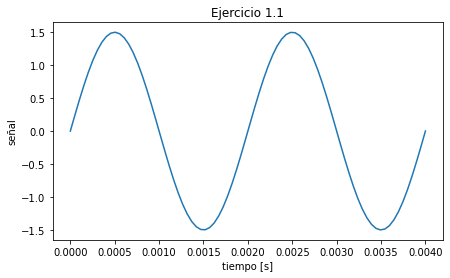

In [10]:
# Ejercicio 1.1
f = 500 # Hz
ampli = 1.5
fm = 20000 # Hz; frecuencia de muestreo
tmax = 0.004    # segundos; tiempo que va a durar la señal
t = np.linspace(0, tmax, int(tmax*fm)) # variable tiempo
y = ampli * np.sin(2*np.pi*f*t)
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t,y)
ax.set_title('Ejercicio 1.1')
ax.set_xlabel('tiempo [s]')
ax.set_ylabel('señal');

In [11]:
# Ejercicio 1.2
f = 500 # Hz
ampli = 1.5
fm = 20000 # Hz; frecuencia de muestreo
tmax = 3    # segundos; tiempo que va a durar la señal
t = np.linspace(0, tmax, int(tmax*fm)) # variable tiempo
y = ampli * np.sin(2*np.pi*f*t)
Audio(y, rate=fm)

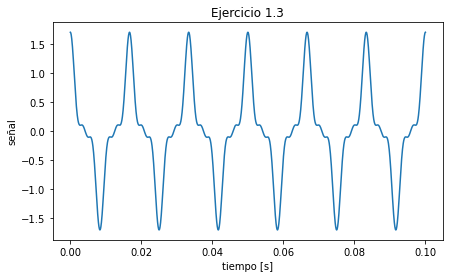

In [12]:
# Ejercicio 1.3
tmax = 0.1    # segundos; tiempo que va a durar la señal
fm1, fm2, fm3 = 20000, 20000, 20000 # Hz; frecuencia de muestreo
A1, A2, A3 = 1, 0.5, 0.2
frec1, frec2, frec3 = 60, 180, 300
phi1, phi2, phi3 = 0, 0, 0
t1 = np.linspace(0, tmax, int(tmax*fm1))
y1 = A1 * np.cos(2*np.pi*frec1*t1 + phi1)
t2 = np.linspace(0, tmax, int(tmax*fm2))
y2 = A2 * np.cos(2*np.pi*frec2*t2 + phi2)
t3 = np.linspace(0, tmax, int(tmax*fm3))
y3 = A3 * np.cos(2*np.pi*frec3*t3 + phi3)
t = t1
ya = y1 + y2 + y3
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t,ya)
ax.set_title('Ejercicio 1.3')
ax.set_xlabel('tiempo [s]')
ax.set_ylabel('señal');

In [13]:
# Ejercicio 1.3: Cambio de la frecuencia de muestreo de y1
tmax = 0.1    # segundos; tiempo que va a durar la señal
fm1, fm2, fm3 = 40000, 20000, 20000 # Hz; frecuencia de muestreo
A1, A2, A3 = 1, 0.5, 0.2
frec1, frec2, frec3 = 60, 180, 300
phi1, phi2, phi3 = 0, 0, 0
t1 = np.linspace(0, tmax, int(tmax*fm1))
y1 = A1 * np.sin(2*np.pi*frec1*t1 + phi1)
t2 = np.linspace(0, tmax, int(tmax*fm2))
y2 = A2 * np.sin(2*np.pi*frec2*t2 + phi2)
t3 = np.linspace(0, tmax, int(tmax*fm3))
y3 = A3 * np.sin(2*np.pi*frec3*t3 + phi3)
t = t1
ya = y1 + y2 + y3
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t,ya)
ax.set_title('Ejercicio 1.3')
ax.set_xlabel('tiempo [s]')
ax.set_ylabel('señal');

ValueError: ignored

**Reflexión:**
Resulta evidente que no pueden sumarse vectores (arrays) que han sido muestreados con diferentes frecuencias. Los valores digitalizados (componentes) de dos señales muestreadas con frecuencias diferentes no comparten los mismos momentos temporales y su suma directa no tiene sentido. Para poder resolver esta situación debería re-muestrearse (resampling) la señal con frecuencia de muestreo más baja para que su nueva frecuencia de muestreo coincida con la de frecuencia superior. Si se quiere operar con diferentes vectores, estos deben compartir la misma escala temporal.

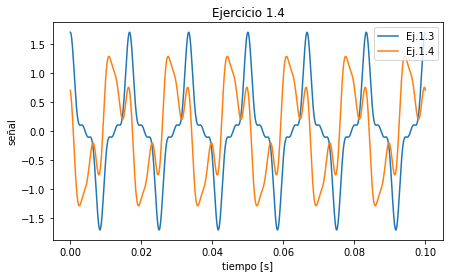

In [17]:
# Ejercicio 1.4
tmax = 0.1    # segundos; tiempo que va a durar la señal
fm1, fm2, fm3 = 20000, 20000, 20000 # Hz; frecuencia de muestreo
A1, A2, A3 = 1, 0.5, 0.2
frec1, frec2, frec3 = 60, 180, 300
phi1, phi2, phi3 = np.pi/2, 0, 0
t1 = np.linspace(0, tmax, int(tmax*fm1))
y1 = A1 * np.cos(2*np.pi*frec1*t1 + phi1)
t2 = np.linspace(0, tmax, int(tmax*fm2))
y2 = A2 * np.cos(2*np.pi*frec2*t2 + phi2)
t3 = np.linspace(0, tmax, int(tmax*fm3))
y3 = A3 * np.cos(2*np.pi*frec3*t3 + phi3)
t = t1
yb = y1 + y2 + y3
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t,ya,label='Ej.1.3')
ax.plot(t,yb,label='Ej.1.4')
ax.set_title('Ejercicio 1.4')
ax.set_xlabel('tiempo [s]')
ax.set_ylabel('señal')
ax.legend();

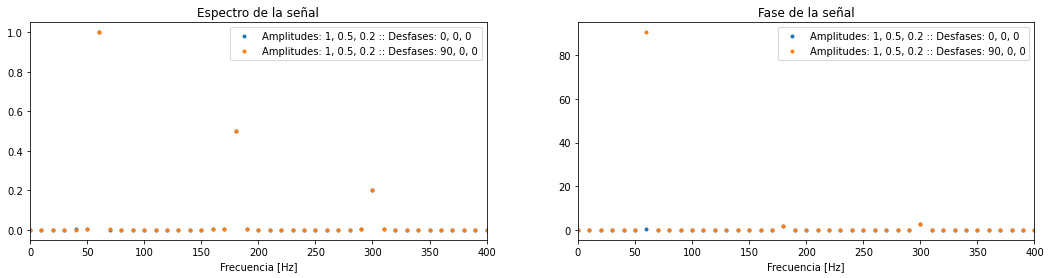

In [18]:
# Ampliación del Ejercicio 1.4 (hay que esperarse al Tema 4 para esto)
# Magnitud y fase en dominio frecuencia
N = len(ya)
tf_ya = np.fft.fft(ya)/N*2
tf_yb = np.fft.fft(yb)/N*2
frec = np.fft.fftfreq(N, 1/fm)
Nmitad = N//2 if N%2==0 else N//2+1

fig = plt.figure(figsize=(18, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(frec[0:Nmitad], np.abs(tf_ya[0:Nmitad]),'.',label='Amplitudes: 1, 0.5, 0.2 :: Desfases: 0, 0, 0')
ax1.plot(frec[0:Nmitad], np.abs(tf_yb[0:Nmitad]),'.',label='Amplitudes: 1, 0.5, 0.2 :: Desfases: 90, 0, 0')
ax1.set_title('Espectro de la señal')
ax1.set_xlabel('Frecuencia [Hz]')
ax1.set_xlim(0,400)
ax1.legend()
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(frec[0:Nmitad], np.angle(tf_ya[0:Nmitad], deg=True)*np.where(np.abs(tf_ya[0:Nmitad])>0.01,1,0),'.',label='Amplitudes: 1, 0.5, 0.2 :: Desfases: 0, 0, 0')
ax2.plot(frec[0:Nmitad], np.angle(tf_yb[0:Nmitad], deg=True)*np.where(np.abs(tf_yb[0:Nmitad])>0.01,1,0),'.',label='Amplitudes: 1, 0.5, 0.2 :: Desfases: 90, 0, 0')
ax2.set_title('Fase de la señal')
ax2.set_xlabel('Frecuencia [Hz]')
ax2.set_xlim(0,400)
ax2.legend();

In [19]:
# Ejercicio 1.5
VMa = np.mean(ya)
VMb = np.mean(yb)
VMAbsa = np.mean(np.abs(ya))
VMAbsb = np.mean(np.abs(yb))
VPa = np.max(ya) - np.min(ya)
VPb = np.max(yb) - np.min(yb)
RMSa = np.sqrt(np.sum(ya**2)/len(ya))
RMSb = np.sqrt(np.sum(yb**2)/len(yb))
print("Ejercicio 1.3: Valor medio: {:.3f}. Valor medio (descontando negativos): {:.3f}. Valor de pico: {:.3f}. Valor eficaz: {:.3f}.".format(VMa,VMAbsa,VPa,RMSa))
print("Ejercicio 1.4: Valor medio: {:.3f}. Valor medio (descontando negativos): {:.3f}. Valor de pico: {:.3f}. Valor eficaz: {:.3f}.".format(VMb,VMAbsb,VPb,RMSb))

Ejercicio 1.3: Valor medio: 0.001. Valor medio (descontando negativos): 0.557. Valor de pico: 3.400. Valor eficaz: 0.804.
Ejercicio 1.4: Valor medio: 0.000. Valor medio (descontando negativos): 0.717. Valor de pico: 2.570. Valor eficaz: 0.803.


**Reflexión:**

El valor eficaz se convierte en una característica (índice, métrica) interesante en señales temporales de media cero.

La media en este caso no es representativa (al estar evaluando señales que oscilan alrededor de cero).

El valor de pico y la media de la señal en valor absoluto proporcionan resultados diferentes en este sencillo ejemplo donde uno de los senos utilizados para construir la señal se desfasa respecto a los otros.

Para evaluar la energía total de una señal (y las dos señales construidas en los ejercicios 1.3 y 1.4 deben tener la misma energía, pues son la composición de tres senos idénticos), el cálculo del valor eficaz resulta lo más apropiado.

Más información <a href="https://www.tutorhunt.com/resource/15609/">aquí</a>.